In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('student-math.csv', delimiter=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df['final_grade'] = df['G1'] + df['G2'] + df['G3']

In [6]:
df.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

In [16]:
def handle_binary_values(df):
    columns = df.columns.values
    
    for column in columns:
        if len(df[column].unique()) == 2:
            binary_dict = {df[column].unique()[0]:0,
                          df[column].unique()[1]:1}
            df[column] = df[column].map(binary_dict)
    
    return df
            
    

In [17]:
df = handle_binary_values(df)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,final_grade
0,0,0,18,0,0,0,4,4,at_home,teacher,...,0,0,4,3,4,1,1,3,6,17
1,0,0,17,0,0,1,1,1,at_home,other,...,1,0,5,3,3,1,1,3,4,16
2,0,0,15,0,1,1,1,1,at_home,other,...,1,0,4,3,2,2,3,3,10,25
3,0,0,15,0,0,1,4,2,health,services,...,1,1,3,2,2,1,1,5,2,44
4,0,0,16,0,0,1,3,3,other,other,...,0,0,4,3,2,1,2,5,4,26
5,0,1,16,0,1,1,4,3,services,other,...,1,0,5,4,2,1,2,5,10,45
6,0,1,16,0,1,1,2,2,other,other,...,1,0,4,4,4,1,1,3,0,35
7,0,0,17,0,0,0,4,4,other,teacher,...,0,0,4,1,4,1,1,1,6,17
8,0,1,15,0,1,0,3,2,services,other,...,1,0,4,2,2,1,1,1,0,53
9,0,1,15,0,0,1,3,4,other,other,...,1,0,5,5,1,1,1,5,0,44


In [84]:
d1 = np.array([df['final_grade'][df['studytime']==1]])
d2 = np.array([df['final_grade'][df['studytime']==2]])
d3 = np.array([df['final_grade'][df['studytime']==3]])
d4 = np.array([df['final_grade'][df['studytime']==4]])
d1.shape = (-1, 1)
d2.shape = (-1, 1)
d3.shape = (-1, 1)
d4.shape = (-1, 1)
d = [d1, d2, d3, d4]

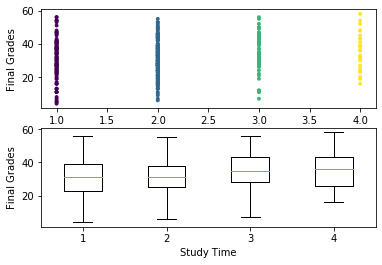

In [85]:
y_values = df['final_grade'].values.tolist()
x_values = df['studytime'].values.tolist()
fig, axs = plt.subplots(2)
axs[0].scatter(x_values, y_values,c=x_values, s=8)
axs[1].boxplot(d)
for ax in axs:
    ax.set(xlabel='Study Time', ylabel='Final Grades')

plt.show()